# Churn Modelling

**G Henry Jacob**

18th April 2021

### Introduction

Churn_Modelling data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

![](https://i2.cdn.turner.com/money/2011/08/30/pf/hurricane_irene_banks_waive_fees/bank-branch.ju.top.jpg)

### Business Problem

The aim is to help the bank to retain their customers. Our findings will help bank to understand their customers and the factors associated with the customer's need and fulfill them.

### Methodology

We will be creating our model with the help of Python so we start off by importing all the required packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

### Collecting Data

In [2]:
# read data using pandas
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15593897,Carr,650,Spain,Male,25,7,160599.06,2,1,1,28391.52,0
3,4,15748595,Stanton,689,France,Female,29,1,77556.79,2,1,1,122998.26,0
4,5,15744109,Hartung,850,France,Male,32,4,0.00,1,1,1,180622.02,0


### Analysing Data

Analyze the churn data and extract the information from it

In [3]:
df.shape

(5692, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# to know the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5692 entries, 0 to 5691
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        5692 non-null   int64  
 1   CustomerId       5692 non-null   int64  
 2   Surname          5692 non-null   object 
 3   CreditScore      5692 non-null   int64  
 4   Geography        5692 non-null   object 
 5   Gender           5692 non-null   object 
 6   Age              5692 non-null   int64  
 7   Tenure           5692 non-null   int64  
 8   Balance          5692 non-null   float64
 9   NumOfProducts    5692 non-null   int64  
 10  HasCrCard        5692 non-null   int64  
 11  IsActiveMember   5692 non-null   int64  
 12  EstimatedSalary  5692 non-null   float64
 13  Exited           5692 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 622.7+ KB


In [6]:
df['Surname'].value_counts()[:10]

Martin      23
Scott       22
Smith       22
Yeh         17
Genovese    16
Ma          16
Shih        16
Maclean     16
Gordon      15
Forbes      15
Name: Surname, dtype: int64

The bank has more customers from  the above family. (Surname)

In [7]:
geography = df['Geography'].value_counts()

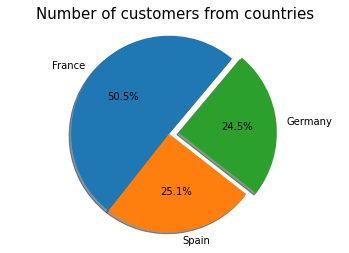

In [8]:
labels = geography.index
sizes = geography.values
explode = (0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle= 50)
ax1.axis('equal')
plt.title('Number of customers from countries', size = 15)
plt.show()

Bank has almost twice the number of customers from **France** than other countries, whereas less number of customers from Germany

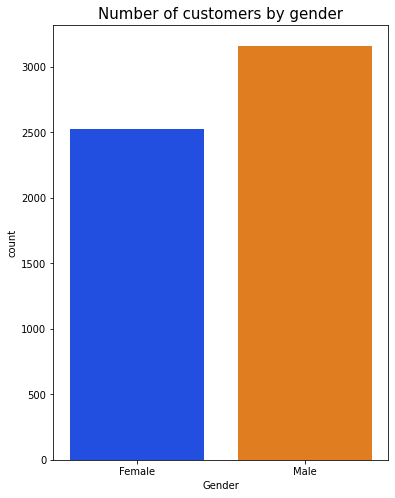

In [9]:
plt.figure(figsize = (6, 8))
sns.countplot(df['Gender'], palette= 'bright')
plt.title('Number of customers by gender', size = 15)
plt.show()

Bank has more number of male customers than female customers

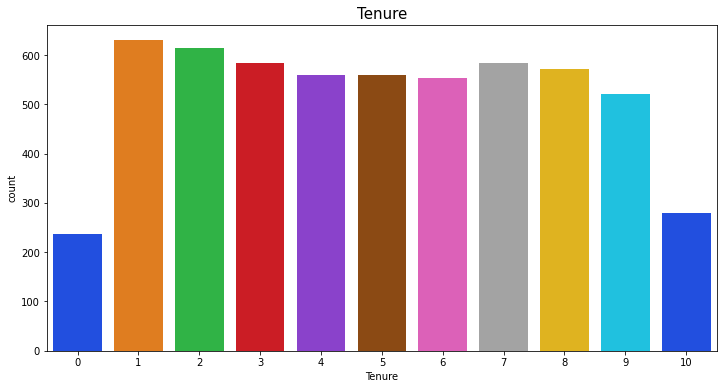

In [10]:
plt.figure(figsize = (12, 6))
sns.countplot(df['Tenure'], palette= 'bright')
plt.title('Tenure', size = 15)
plt.show()

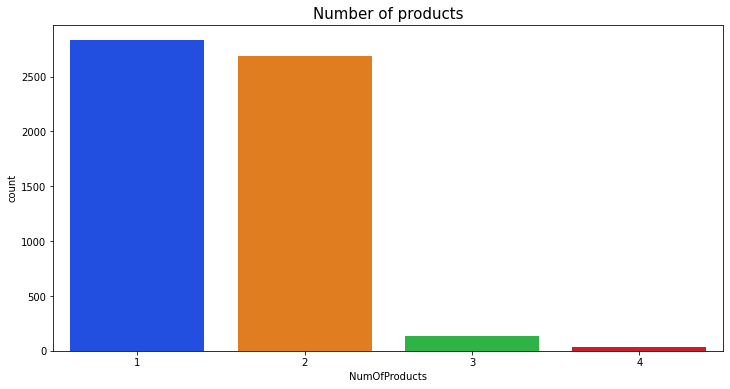

In [11]:
plt.figure(figsize = (12, 6))
sns.countplot(df['NumOfProducts'], palette= 'bright')
plt.title('Number of products', size = 15)
plt.show()

Customers bought 1 or 2 products more time

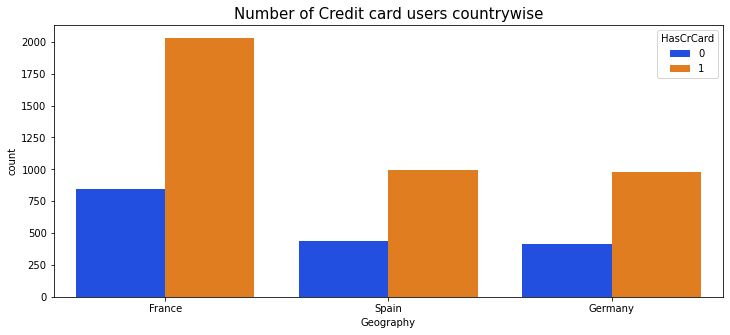

In [12]:
plt.figure(figsize = (12, 5))
sns.countplot(x = df['Geography'], hue = df['HasCrCard'], palette= 'bright')
plt.title('Number of Credit card users countrywise', size = 15)
plt.show()

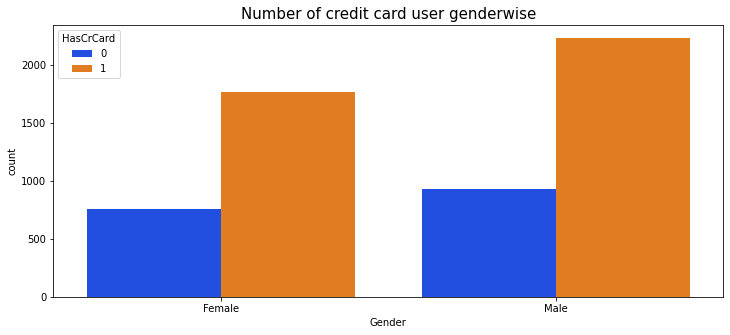

In [13]:
plt.figure(figsize = (12, 5))
sns.countplot(x = df['Gender'], hue = df['HasCrCard'], palette= 'bright')
plt.title('Number of credit card user genderwise', size = 15)
plt.show()

More customers have credit card in countrywise as well as genderwise

In [14]:
df['EstimatedSalary'].describe()

count      5692.000000
mean      99757.268373
std       57512.971784
min          11.580000
25%       51014.837500
50%       99913.850000
75%      148704.387500
max      199970.740000
Name: EstimatedSalary, dtype: float64

The above result shows the minimum, maximum and mean value of the Estimated Salary 

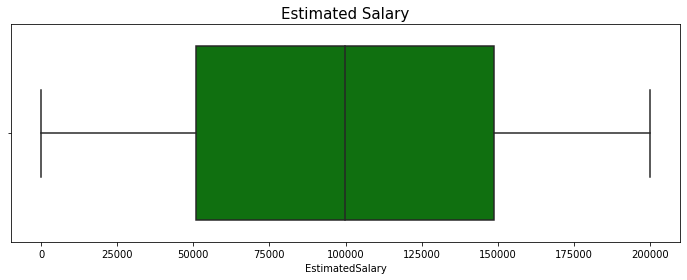

In [15]:
plt.figure(figsize = (12, 4))
sns.boxplot(df['EstimatedSalary'], color = 'green')
plt.title('Estimated Salary', size = 15)
plt.show()

Above figure infers that there is no skewness in the data

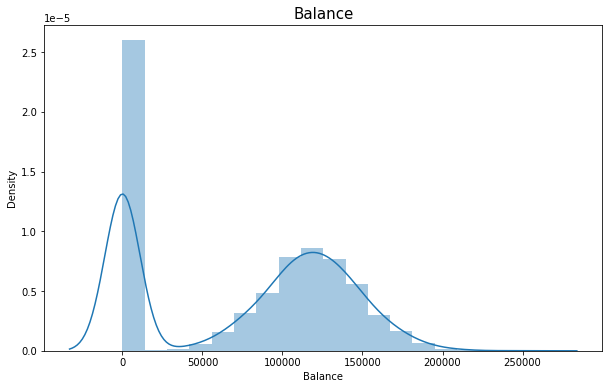

In [16]:
plt.figure(figsize = (10, 6))
sns.distplot(df['Balance'])
plt.title('Balance', size = 15)
plt.show()

More customers have 0 balance than other customers <br>Balance is normaly distributed except the customers who have 0 balance

 Seperate the customers and see whether the bank has more customers without balance(balance = 0) or with balance(balance > 0)

In [17]:
balance = np.where(df['Balance'] == 0, 0, 1)

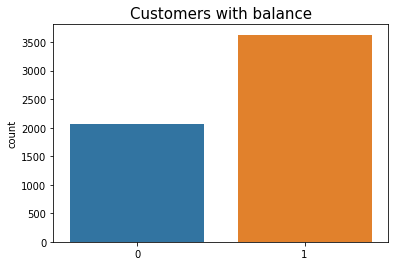

In [18]:
plt.figure(figsize = (6, 4))
sns.countplot(balance)
plt.title('Customers with balance', size = 15)
plt.show()

Bank has more customers who maintain their balance than customers who have 0 balance

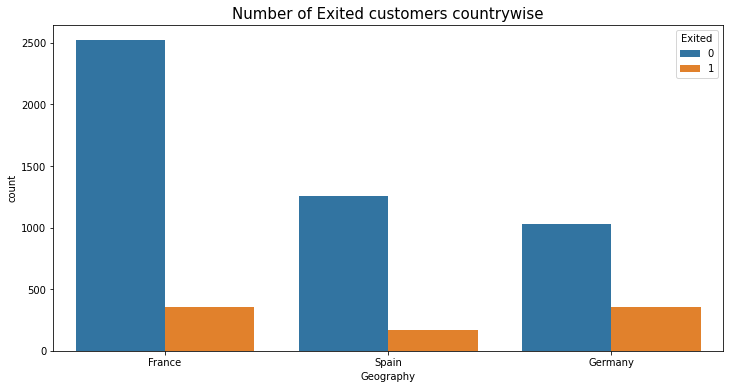

In [19]:
plt.figure(figsize = (12, 6))
sns.countplot(x = df['Geography'], hue = df['Exited'])
plt.title('Number of Exited customers countrywise', size = 15)
plt.show()

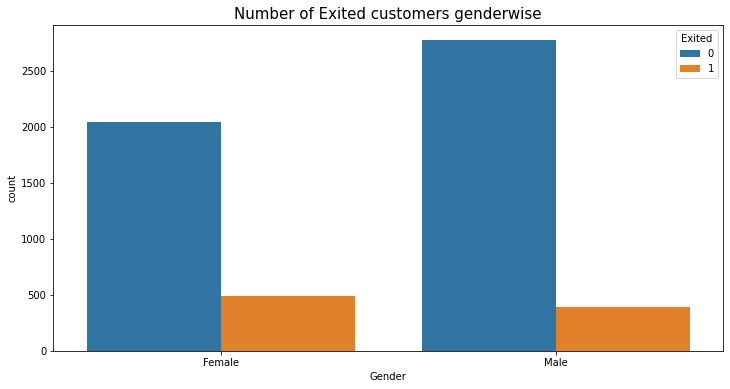

In [20]:
plt.figure(figsize = (12, 6))
sns.countplot(df['Gender'], hue = df['Exited'])
plt.title('Number of Exited customers genderwise', size = 15)
plt.show()

Less customers exited in countrywise as well as genderwise

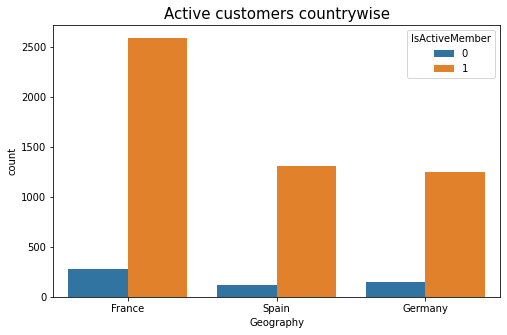

In [22]:
plt.figure(figsize = (8, 5))
sns.countplot(df['Geography'], hue = df['IsActiveMember'])
plt.title('Active customers countrywise', size = 15)
plt.show()

There is small numer of cusomers are not active

In [23]:
exited = df[df['Exited'] == 1]

In [24]:
france = exited[exited['Geography'] == 'France']
spain = exited[exited['Geography'] == 'Spain']
germany = exited[exited['Geography'] == 'Germany']

In [25]:
print(f'{france.shape[0]} customers closed their accounts in france, {spain.shape[0]} customers closed their accounts in spain and \n{germany.shape[0]} customers closed their account in germany')

352 customers closed their accounts in france, 166 customers closed their accounts in spain and 
359 customers closed their account in germany


More cusomers from Germany closed their accounts

In [26]:
male = exited[exited['Gender'] == 'Male']
female = exited[exited['Gender'] == 'Female']

In [27]:
print(f'{male.shape[0]} Male customers closed their account and {female.shape[0]} Female customers closed their accounts')

392 Male customers closed their account and 485 Female customers closed their accounts


More female customers closed their accounts than male customers

### Hypothesis Testing

Statistical test on data and explore more information from it.

#### Shapiro–Wilk test

In [28]:
# import shapiro
from scipy.stats import shapiro

create a function to plot the distribution of the continuous values and it's mean

In [29]:
def distribution_plot(data):
    plt.figure(figsize = (11, 7))
    ax = sns.distplot(data)
    plt.axvline(np.mean(data), color = 'red', linestyle = 'dashed')
    _, max_ = plt.ylim()
    plt.text(np.mean(data) + np.mean(data)/10,
               max_ - max_/10,
               'Mean:{:.2f}'.format(data.mean()))
    return plt.show()

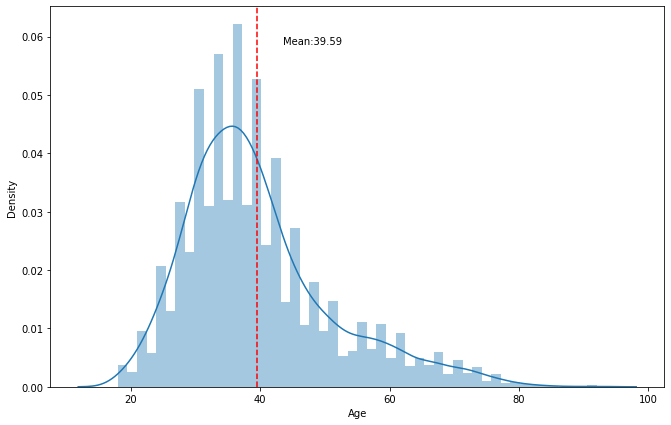

In [30]:
distribution_plot(df['Age'])

It doesn't looks like normal distribution, shapiro wilk test is one of the statistical test used to check whether the sample data drawn from the population is normally distributed or not

In [37]:
sample_age = df['Age'].sample(25)

In [38]:
#function to perform shapiro test
def shapiro_test(data):
    stat, p = shapiro(data)
    print(f'Statistical value :{stat}')
    print(f'P value is {p}')
    if p > 0.05:
        print('Normaly distributed, failed to reject Null Hypothesis(H0)')
    else:
        print('Not a Normal distribution, reject Null Hypothesis(H0)')

In [39]:
shapiro_test(sample_age)

Statistical value :0.8554052114486694
P value is 0.002234451938420534
Not a Normal distribution, reject Null Hypothesis(H0)


#### independent sample t test

In [40]:
# import library
from scipy.stats import ttest_ind

create a function to plot data distribution from two different group

In [41]:
def plot_two_distribution(data1, data2):
    plt.figure(figsize = (11, 7))
    ax1 = sns.distplot(data1)
    ax2 = sns.distplot(data2)
    plt.axvline(np.mean(data1), color = 'red', linestyle = 'dashed')
    plt.axvline(np.mean(data2), color = 'blue', linestyle = 'dashed')
    return plt.show()

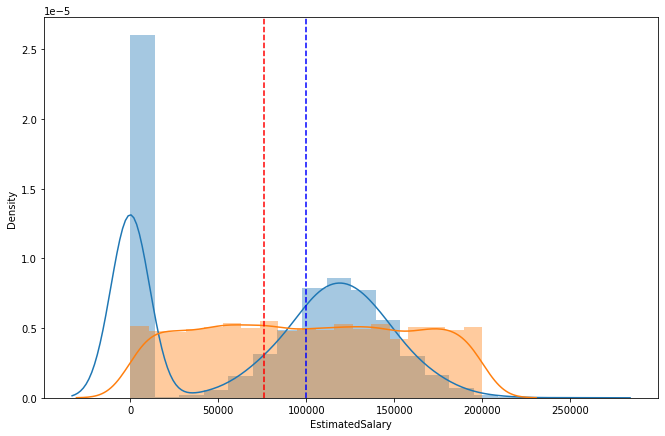

In [42]:
plot_two_distribution(df['Balance'], df['EstimatedSalary'])

line which indicates the mean of each population, clearly shows there is difference between both data

In [54]:
# function to perform independent sample t-test
def ttest_independent(data1, data2):
    stat, p = ttest_ind(data1, data2)
    print(f'Statistical value :{stat}')
    print(f'P value is {p}')
    if p > 0.05:
        print('There is no difference between both groups, fail to reject Null Hypothesis(H0)')
    else:
        print('There is difference between both groups, reject Null Hypothesis(H0)')

In [55]:
sample_balance = df['Balance'].sample(25)
sample_est_salary = df['EstimatedSalary'].sample(25)

In [56]:
ttest_independent(sample_balance, sample_est_salary)

Statistical value :-3.1222261453287636
P value is 0.0030383090162547166
There is difference between both groups, reject Null Hypothesis(H0)


#### ANOVA test

In [57]:
# import library
from scipy.stats import f_oneway

one way ANOVA used to check is there any relationship between categorical group which contain more than two category and a continuous gruop

In [58]:
groups = df.groupby('Geography').groups

In [59]:
france_salary = df['EstimatedSalary'][groups['France']]
spain_salary = df['EstimatedSalary'][groups['Spain']]
germany_salary = df['EstimatedSalary'][groups['Germany']]

In [60]:
stat, p = f_oneway(france_salary, spain_salary, germany_salary)
print(f'P value is {p}')
if p > 0.05:
    print('There is no difference between the groups, fail to reject Null Hypothesis(H0)')
else:
    print('Difference between groups, reject Null Hypothesis')

P value is 0.6862338346148008
There is no difference between the groups, fail to reject Null Hypothesis(H0)


Didn't find any difference between country's estimated salary, below ANOVA test conducts on each country's balance

In [61]:
france_balance = df['Balance'][groups['France']]
spain_balance = df['Balance'][groups['Spain']]
germany_balance = df['Balance'][groups['Germany']]

In [62]:
stat, p = f_oneway(france_balance, spain_balance, germany_balance)
print(f'P value is {p}')
if p > 0.05:
    print('There is no difference between the groups, fail to reject Null Hypothesis(H0)')
else:
    print('Difference between groups, reject Null Hypothesis')

P value is 3.230477437513559e-217
Difference between groups, reject Null Hypothesis


ANOVA results shows there is difference between balance between countries, Tukey test should be counduct to know more about it 

#### Tukey's test

In [63]:
# import library
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [64]:
def tukey_test(cont, categ):
    tukey = pairwise_tukeyhsd(endog= cont,
                             groups= categ)
    tukey.plot_simultaneous()
    plt.vlines(x = np.mean(cont), ymin=-0.5, ymax=len(categ.unique()) - .5, color = 'red')
    print(tukey.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------
 France Germany  58499.2688  0.001  54144.5439  62853.9937   True
 France   Spain   1872.6927 0.5621  -2446.9158   6192.3011  False
Germany   Spain -56626.5761  0.001 -61651.2099 -51601.9424   True
-----------------------------------------------------------------


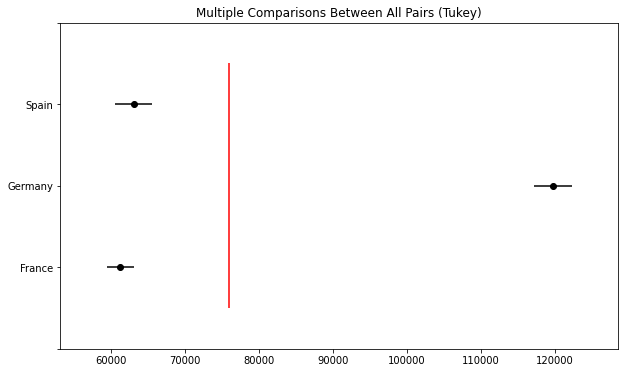

In [65]:
tukey_test(df['Balance'], df['Geography'])

black line shows the minimum and maximum of balance and the dot indicates the mean of each country's balance <br>Red line shows the mean of balance of all countries<br>Germany's balance is too far from the rest of the countries, It clearly shows **Germans maintain their balance very high**

#### chi-squared test

chi-squared test is used to find is there any relationship between two categorical groups

In [66]:
# import library
from scipy.stats import chi2_contingency

In [67]:
contingency_data = pd.crosstab(df['Gender'], df['Geography'])
contingency_data

Geography,France,Germany,Spain
Gender,,,
Female,1292,628,609
Male,1582,764,817


It shows the combination of categories

In [68]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print(f'stats :{np.round(stat, 3)}')
print(f'p value is :{np.round(p, 3)}')
if p > 0.05:
    print('Independent categories')
else:
    print('Dependent categories')

stats :2.3
p value is :0.317
Independent categories


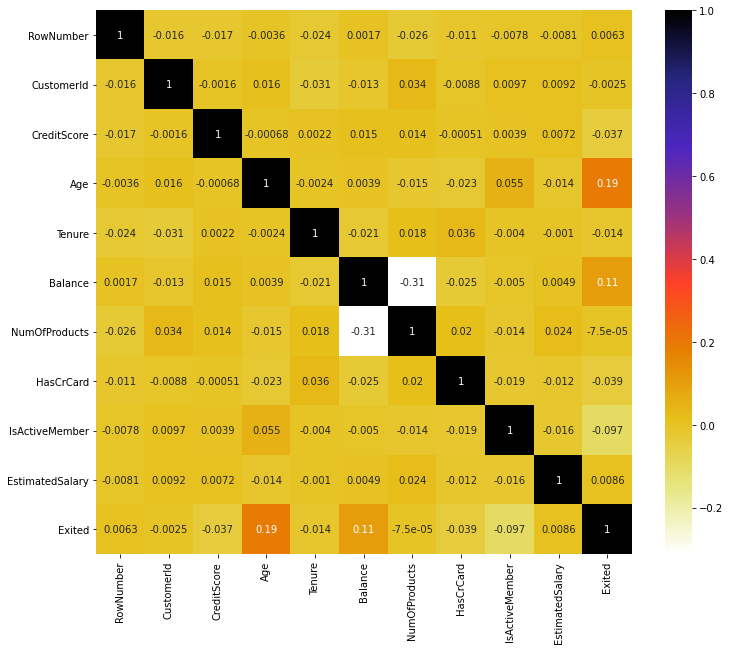

In [69]:
plt.figure(figsize = (12, 10))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

There is no correlation in the data

### Data Wrangling

Data wrangling is the process of **data cleaning**

In [70]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

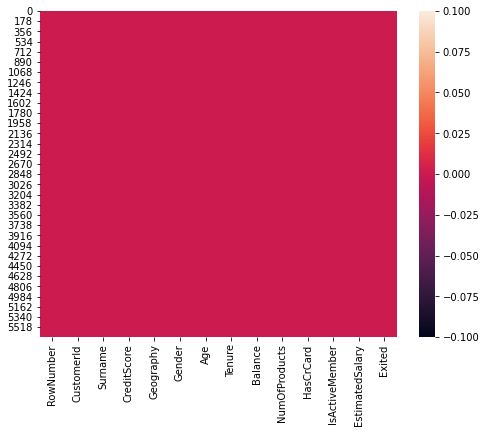

In [71]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull())
plt.show()

There is no null values in the data, the next step is remove unwanted data...

In [72]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15593897,Carr,650,Spain,Male,25,7,160599.06,2,1,1,28391.52,0
3,4,15748595,Stanton,689,France,Female,29,1,77556.79,2,1,1,122998.26,0
4,5,15744109,Hartung,850,France,Male,32,4,0.00,1,1,1,180622.02,0


In [73]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

### One-hot Encoding

In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,650,Spain,Male,25,7,160599.06,2,1,1,28391.52,0
3,689,France,Female,29,1,77556.79,2,1,1,122998.26,0
4,850,France,Male,32,4,0.00,1,1,1,180622.02,0


In [75]:
geography = pd.get_dummies(df['Geography'], drop_first= True)
gender = pd.get_dummies(df['Gender'], drop_first= True)

In [76]:
df_new = pd.concat([df, geography, gender], axis = 1)

In [77]:
df_new.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [78]:
df_new.drop(['Geography', 'Gender'], axis = 1, inplace = True)

In [79]:
df_new.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


Now the data is cleaned and ready to fit

In [80]:
X = df_new.drop(['Exited'], axis = 1).copy()
y = df_new['Exited'].copy()

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h4>check the data before fit,</h4>
<h4>whether the data is balance or imbalance</h4>
</div>


If the data is imbalance the model will acts as bias. It's Not a good model even it gives high accuracy

In [81]:
y.value_counts()

0    4815
1     877
Name: Exited, dtype: int64

The data is imabalanced, to make it a balanced one, there are few techniques <br>Under sampling, Over sampling, create many models and take majority votes

**SMOTE**, one of the functon from over sampling used to make data balance by creating synthetic data on minority class

In [82]:
# import library
from imblearn.over_sampling import SMOTE

In [83]:
smote = SMOTE(sampling_strategy= 'minority')

In [84]:
X_sm, y_sm = smote.fit_resample(X, y)

The data balanced using SMOTE

target values have equal number of classes **now it's ready to fit**

### Training Data

In [85]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0, stratify= y_sm)

In [87]:
rf_classifier = RandomForestClassifier().fit(X_train, y_train)

### Testing Data

In [88]:
pred = rf_classifier.predict(X_test)

In [89]:
# import library
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

### Accuracy

In [90]:
print(f'Accuracy score is :{accuracy_score(y_test, pred)}')

Accuracy score is :0.9164070612668743


In [91]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       963
           1       0.95      0.88      0.91       963

    accuracy                           0.92      1926
   macro avg       0.92      0.92      0.92      1926
weighted avg       0.92      0.92      0.92      1926



Model gives almost equal precision, recall and f1-score for both classes

In [92]:
# to plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_name, figsize = (8, 6), fontsize = 13):
    plt.figure(figsize = figsize)
    d_frame = pd.DataFrame(conf_matrix, index = class_name, columns = class_name)
    try:
        heatmap = sns.heatmap(d_frame, annot = True, fmt='d')
    except ValueError:
        raise ValueError('Values must be integers')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, fontsize = fontsize)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, fontsize = fontsize)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.show()

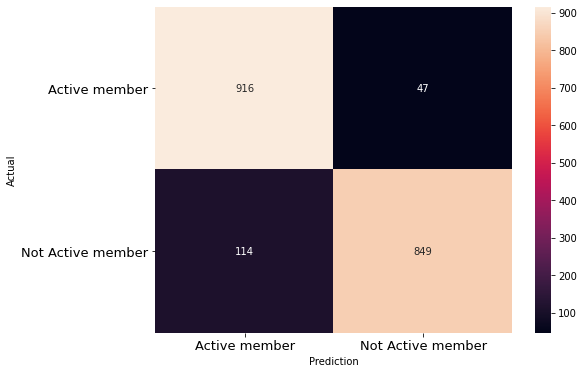

In [93]:
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, ['Active member', 'Not Active member'])

In [94]:
# to generate roc curve
def generate_roc_curve(model, X_test):
    plt.figure(figsize = (10, 7))
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_score = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color = 'red', label = 'ROC Score :'+ str(roc_score))
    plt.title('ROC Curve', size = 15)
    plt.legend(loc = 4)
    plt.show()

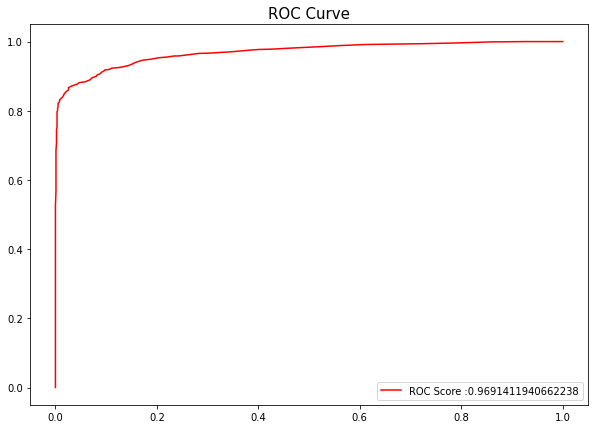

In [95]:
generate_roc_curve(rf_classifier, X_test)

### hyperparameter tuning

hyperparameters will be tune. So, that the model can optimally solve the problem

In [96]:
# import library
from sklearn.model_selection import GridSearchCV

In [97]:
params = [
          {'criterion' :['gini'], 'n_estimators' : [100, 300, 500], 'max_depth' : [5, 8, 15],
          'min_samples_split' : [2, 5, 10], 'min_samples_leaf' : [1, 2, 5]},
          {'criterion' :['entropy'], 'n_estimators' : [100, 300, 500], 'max_depth' : [5, 8, 15],
          'min_samples_split' : [2, 5, 10], 'min_samples_leaf' : [1, 2, 5]}
]

In [98]:
model = RandomForestClassifier()

In [99]:
grs = GridSearchCV(estimator=model, param_grid= params, scoring='accuracy', cv = 10, n_jobs= -1)

In [100]:
gs = grs.fit(X_train, y_train)

In [101]:
gs.best_score_

0.9275688513820809

In [102]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [103]:
rc_model = RandomForestClassifier(criterion='gini', max_depth=15, 
                                  min_samples_leaf=1, min_samples_split=2, 
                                  n_estimators=300).fit(X_train, y_train)

In [104]:
pred = rc_model.predict(X_test)

In [105]:
print(f'Accuracy is :{accuracy_score(y_test, pred)}')

Accuracy is :0.9153686396677051


In [106]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       963
           1       0.94      0.88      0.91       963

    accuracy                           0.92      1926
   macro avg       0.92      0.92      0.92      1926
weighted avg       0.92      0.92      0.92      1926



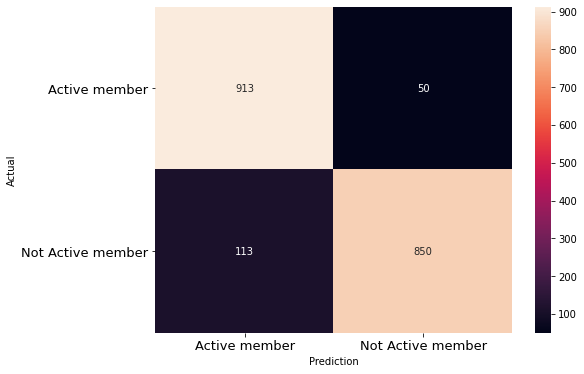

In [107]:
con_mat = confusion_matrix(y_test, pred)
plot_confusion_matrix(con_mat, ['Active member', 'Not Active member'])

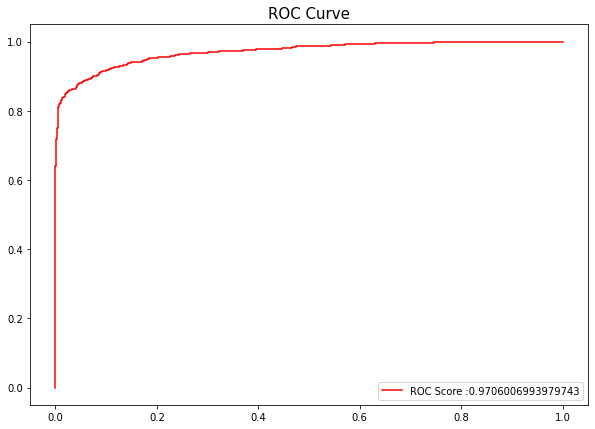

In [108]:
generate_roc_curve(rc_model, X_test)

Most of the time Random forest works well without hyperparameter tuning. It works good and gives better result with it’s default parameter.

### Results

Bank has more customers from France than Spain and Germany. Even though German customers are less they maintain high balance in their accounts. More number of German customers closed their accounts. Bank has more Male customers than Female customers. Even though female customers were minority more of them closed their accounts than Male customers. Most of the time the customers purchased 1 or 2 products only. Majority of Bank customers have credit cards. Almost half of the customers maintain their balance 0. Less customers are exited (reason may – poor service, schemes, interest, etc.). There is no relationship between the estimated salary and balance. Certain customers closed their accounts in each country.

### Conclusion

The purpose of this project is to help the Bank to retain their customers and attract more customers and profit.

We could see certain customers exited. To retain the customers, the Bank must provide good services, schemes, etc.

To make more profit the bank should open branches in Germany, where the customers maintain their balance high.

More customers closed their accounts in Germany. To retain them the bank should offer high interest, services, etc.

There was already less female customers than their counterpart, worse the female customers keep dwindling down on.The bank should improve it's customer service, and security.

---